# Data in Motion Weekly Data Analysis Challenge
## Week 20: Exploring Stock Time Series Data

Link to dataset: https://buff.ly/3O7sB6r

Challenge Questions:

1.    Check out the type of the columns
2.    Transform the Date column as a datetime type
3.    Set the date as the index
4.    Is there any duplicate dates?
5.    Sort the index so the first entry is the oldest date
6.    Get the last business day of each month
7.    What is the difference in days between the first day and the oldest
8.    How many months in the data we have?
9.    Plot the 'Adj Close' value
10.    Create your own question and answer it.

In [1]:
# import libraries

import pandas as pd
import seaborn as sns

In [2]:
# read in data:
url = 'https://buff.ly/3O7sB6r' 
df = pd.read_csv(url) 

In [3]:
# view head of data
df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 1.    Check out the type of the columns


In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 2.    Transform the Date column as a datetime type


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### 3.    Set the date as the index


In [7]:
df = df.set_index('Date')

In [8]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 4.    Is there any duplicate dates?


In [9]:
dup_dates = df.index.duplicated().sum()

f"There are {dup_dates} duplicate dates"

'There are 0 duplicate dates'

### 5.    Sort the index so the first entry is the oldest date


In [10]:
df = df.sort_index()

In [11]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### 6.    Get the last business day of each month


In [12]:
df['last_bd'] = (df.index + pd.offsets.BMonthEnd(0))

In [13]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,last_bd
Date,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,1980-12-31
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980-12-31
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980-12-31
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980-12-31
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980-12-31


### 7.    What is the difference in days between the first day and the oldest


In [14]:
date_delta = df.reset_index().copy()
date_delta = date_delta['Date'].iat[-1] - date_delta['Date'].iat[0]
date_delta

Timedelta('12261 days 00:00:00')

### 8.    How many months in the data we have?


In [15]:
tot_months = df['last_bd'].dt.to_period('M').nunique()

f"There are {tot_months} months in the data"

'There are 404 months in the data'

### 9.    Plot the 'Adj Close' value


<Axes: xlabel='Date', ylabel='Adj Close'>

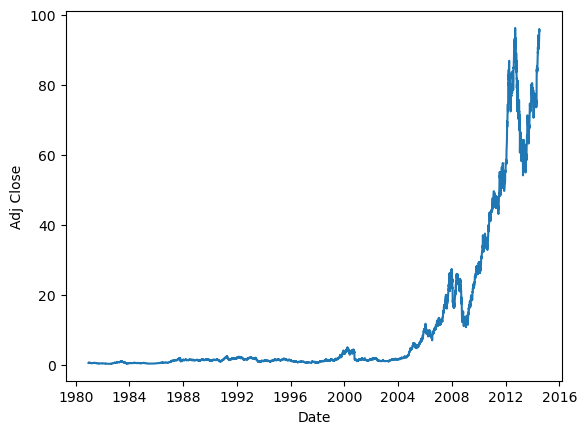

In [16]:
sns.lineplot(df, x='Date', y='Adj Close')

### 10. Which day saw the largest increase from the opening to closing price?

In [17]:
delta = df.copy()
delta['Change'] = delta['Close'] - delta['Open']
delta.sort_values('Change', ascending=False).head(1)

,Open,High,Low,Close,Volume,Adj Close,last_bd,Change
Date,,,,,,,,
2012-04-17,578.94,610.0,571.91,609.7,256382000,83.25,2012-04-30,30.76
